## Lesson_7 Pandas

In [2]:
import pandas as pd
people = [3.3,1.3,14,13.5]
a = pd.Series(people)
print('The Series is:\n',a)
print("The values are:\n",a.values)
print("The index is ?\n",a.index)
print(a[1])
print(a[:2])

The Series is:
 0     3.3
1     1.3
2    14.0
3    13.5
dtype: float64
The values are:
 [ 3.3  1.3 14.  13.5]
The index is ?
 RangeIndex(start=0, stop=4, step=1)
1.3
0    3.3
1    1.3
dtype: float64


In [ ]:
country = ["USA","JP","CHN","IND"]
b = pd.Series(people,country) # 顺序很重要！后面可以摸索研究一下~
print(b)
#print(b[1])       
print(b["USA"])

USA     3.3
JP      1.3
CHN    14.0
IND    13.5
dtype: float64
3.3


In [5]:
data = {"USA":3.3,"JP":1.3,"CH":14,"IN":13.5}
c = pd.Series(data)
print(c)
print(c["CH"])

d = pd.Series(data,index = ["USA","CH"])
print(d)

USA     3.3
JP      1.3
CH     14.0
IN     13.5
dtype: float64
14.0
USA     3.3
CH     14.0
dtype: float64


索引

In [ ]:
test = pd.Series(people,index = [5,3,10,6])
print(test)
print(test[5])
print(test[:2])

5      3.3
3      1.3
10    14.0
6     13.5
dtype: float64
3.3
5    3.3
3    1.3
dtype: float64


In [10]:
test.loc[3]
test.loc[:3]
test.iloc[3]
test.iloc[:3]

5      3.3
3      1.3
10    14.0
dtype: float64

## 作业：

根据联合国经济和社会事务部(WPP)发布的世界人口数据WPP2024_POP.xlsx  绘制1950-2100 年间的中国，美国和印度的人口变化趋势线图。

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 数据导入及清洗
df = pd.read_excel('D:\\my study\\Python Study\\Lesson\\WPP2024_POP.xlsx',header = 16,sheet_name='Estimates',index_col=2)
year = df.loc['China']['Year'].replace('...',0).to_numpy().astype(float)
china = df.loc['China']
india = df.loc['India']
usa = df.loc['United States of America']

def statistic(country):
    pop = country['Total Population, as of 1 January (thousands)'].replace('...',0).to_numpy().astype(float)
    # 通过出生率，死亡率和移民率得到人口增长率
    birth = country['Crude Birth Rate (births per 1,000 population)'].replace('...',0).to_numpy().astype(float)
    death = country['Crude Death Rate (deaths per 1,000 population)'].replace('...',0).to_numpy().astype(float)
    migration = country['Net Migration Rate (per 1,000 population)'].replace('...',0).to_numpy().astype(float)
    pure = (birth - death + migration)/1000
    return pop,pure

pop_china,rate_china = statistic(china)
pop_india,rate_india = statistic(india)
pop_usa,rate_usa = statistic(usa)

# 加入需要预测的年份
year_add = []
for i in np.arange(2024,2101,1):
    year_add.append(i)
year_add = np.array(year_add)

year_whole = np.hstack((year,year_add))

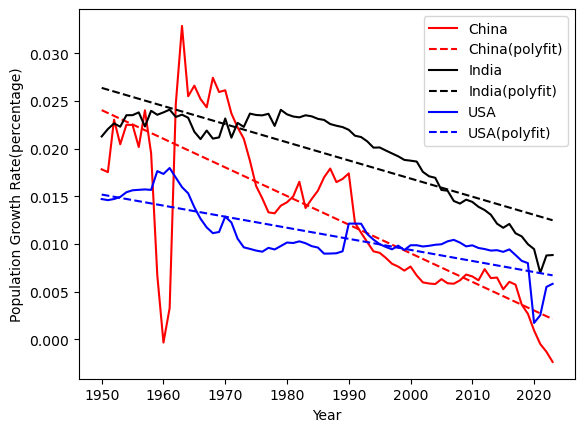

In [92]:
# 通过拟合函数预测人口增长率
def anticipate(year,year_add,rate):
     dev = 1e+100
     s = 0
     for i in range(2):
         a = np.polyfit(year,rate,i)
         p = np.poly1d(a)
         y= p(year)
         if np.sum(np.abs(y-rate)) < dev:
             dev = np.sum(np.abs(y-rate))
             s = i
     a = np.polyfit(year,rate,s)
     p= np.poly1d(a)
     y = p(year)
     y_add = p(year_add)
     return(y,y_add,p)

y_china , y_china_add , p_china = anticipate(year,year_add,rate_china)
y_india , y_india_add , p_india = anticipate(year,year_add,rate_india)
y_usa , y_usa_add , p_usa = anticipate(year,year_add,rate_usa)

# 展示拟合情况
plt.figure()
plt.plot(year,rate_china,'r-',label='China')
plt.plot(year,y_china,'r--',label='China(polyfit)')
plt.plot(year,rate_india,'k-',label='India')
plt.plot(year,y_india,'k--',label='India(polyfit)')
plt.plot(year,rate_usa,'b-',label='USA')
plt.plot(year,y_usa,'b--',label='USA(polyfit)')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate(percentage)')
plt.show()

In [93]:
# 预测人口，合并成完整人口数据
def pop(pop_ini,y_add):
     pop_add = []
     pop_add.append(pop_ini[-1]*(1 + y_add[0]))
     for i in np.arange(2025,2101,1):
         pop_add.append(pop_add[-1]*(1 + y_add[i-2024]))
     pop_whole = np.hstack((pop_ini,np.array(pop_add)))
     print(pop_add)
     return pop_whole
pop_china_whole = pop(pop_china,y_china_add)
pop_india_whole = pop(pop_india,y_india_add)
pop_usa_whole = pop(pop_usa,y_usa_add)

[1426877.5026616442, 1429070.5437985235, 1430837.9747347783, 1432178.0802275077, 1433089.5272233759, 1433571.3670466512, 1433623.0370136932, 1433244.3614700981, 1432435.5522479187, 1431197.208541595, 1429530.3162024464, 1427436.2464528033, 1424916.7540220702, 1421973.9747082337, 1418610.422369527, 1414828.9853521665, 1410632.9223612482, 1406025.8577830577, 1401011.7764681857, 1395595.0179859619, 1389780.2703618011, 1383572.5633101251, 1376977.260976539, 1370000.0542039413, 1362646.952338192, 1354924.2745898787, 1346838.6409695896, 1338396.9628149208, 1329606.4329282315, 1320474.5153448777, 1311008.9347523379, 1301217.6655812662, 1291108.9207900784, 1280691.1403651927, 1269972.9795595037, 1258963.2968920707, 1247671.141932348, 1236105.7428925652, 1224276.494052097, 1212192.9430378273, 1199864.7779846222, 1187301.814600076, 1174513.9831576878, 1161511.3154425554, 1148303.931673557, 1134902.0274258049, 1121315.8605769207, 1107555.7383003968, 1093632.004128962, 1079555.025110474, 1065335.1

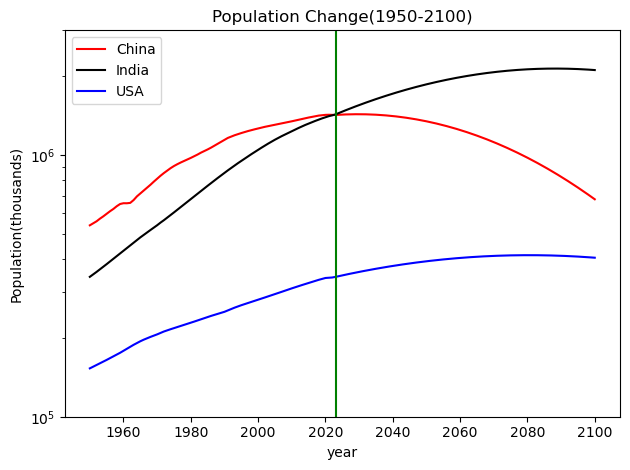

In [94]:
# 绘制人口变化趋势图
plt.figure()
plt.plot(year_whole,pop_china_whole,'r-',label = 'China')
plt.plot(year_whole,pop_india_whole,'k-',label = 'India')
plt.plot(year_whole,pop_usa_whole,'b-',label = 'USA')
plt.legend(loc = 'best')
plt.axvline(x = 2023, c = 'green')
plt.yscale('log')
plt.xlabel('year')
plt.ylabel('Population(thousands)')
plt.ylim(1e+5,3e+6)
plt.title('Population Change(1950-2100)')
plt.tight_layout()
plt.show()